In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn import neighbors
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import make_regression
import matplotlib
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from  sklearn import  preprocessing
from sklearn.impute import KNNImputer
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
def SeasonLebal(X):
    l = []
    for s in X['Seasons']:
        i = 0
        if s == 'Winter':
            l.append(0)
        elif s == 'Spring':
            l.append(2)
        elif s == 'Summer':
            l.append(2)
        elif s == 'Autumn':
            l.append(3)
    return l
def LabelFeature(X):
    winter,spring,summer,automn = HotEncodingTest(X)
    Seasons=pd.DataFrame({'winter':winter,'spring':spring,
                         'summer':summer,'automn':automn})
    X = pd.concat([X, Seasons], axis=1)
    X = X.drop(['Seasons'], axis=1)
    #X['Seasons'] = LabelEncoder().fit_transform(X['Seasons'])
    X['Functioning Day'] = LabelEncoder().fit_transform(X['Functioning Day'])

    X3= OneHotEncoder().fit_transform(X['Holiday'].values.reshape(-1,1)).toarray()
    dfHot3 = pd.DataFrame(X3, columns=['Holiday_' + str(int(i)) for i in range(X3.shape[1])])

    X = pd.concat([X, dfHot3], axis=1)
    X = X.drop(['Holiday'], axis=1)
    #X['Holiday'] = LabelEncoder().fit_transform(X['Holiday'])
    #X['Day'] = LabelEncoder().fit_transform(X['Day'])
    #X['Month'] = LabelEncoder().fit_transform(X['Month'])
    return X

def ZeosHabda(pre):
    j=0
    for i in pre:
        if(i<0):
            pre[j]=0
        j=j+1
    return pre

def HotEncoding(X):
    winter,spring,summer,automn = HotEncodingTest(X)
    Seasons=pd.DataFrame({'winter':winter,'spring':spring,
                         'summer':summer,'automn':automn})
    X = pd.concat([X, Seasons], axis=1)
    X = X.drop(['Seasons'], axis=1)
    
    X2 =  OneHotEncoder().fit_transform(X['Functioning Day'].values.reshape(-1,1)).toarray()
    dfHot2 = pd.DataFrame(X2, columns=['Functioning Day_' + str(int(i)) for i in range(X2.shape[1])])
    X = pd.concat([X, dfHot2], axis=1)
    X = X.drop(['Functioning Day'], axis=1)
    X3= OneHotEncoder().fit_transform(X['Holiday'].values.reshape(-1,1)).toarray()
    dfHot3 = pd.DataFrame(X3, columns=['Holiday_' + str(int(i)) for i in range(X3.shape[1])])
    X = pd.concat([X, dfHot3], axis=1)
    X = X.drop(['Holiday'], axis=1)
    
    return X

def HotEncodingTest(X):
    winter=[]
    summer=[]
    spring=[]
    automn=[]
    for i in X['Seasons']:
        if(i=='Winter'):
            winter.append(1)
            automn.append(0)
            summer.append(0)
            spring.append(0)
        elif (i == 'Spring'):
            winter.append(0)
            automn.append(0)
            summer.append(0)
            spring.append(1)
        elif (i == 'Summer'):
            winter.append(0)
            automn.append(0)
            summer.append(1)
            spring.append(0)
        elif (i == 'Autumn'):
            winter.append(0)
            automn.append(1)
            summer.append(0)
            spring.append(0)
    return winter,automn,summer,spring

#, 'Solar Radiation (MJ/m2)','Rainfall(mm)', 'Snowfall (cm)'
def StanderlizationFeature(X):

    names = [ 'Visibility (10m)'
             ,'Dew point temperature(°C)']
    for i in names:
        s = StandardScaler().fit(X[[i]])
        X[i] = s.transform(X[[i]])
    return X

def MissNegibour(X):
    imputer = KNNImputer(n_neighbors=10, weights='uniform', metric='nan_euclidean')
    # fit on the dataset
    imputer.fit(X)
    # transform the dataset
    Xtrans = imputer.transform(X)
    return Xtrans


def MisColum(x,y):
    model=LinearRegression()
    model.fit(x,y)
    p=model.predict(x)
    prediction = pd.DataFrame({'Rainfall': p})
    prediction.to_csv('/content/drive/MyDrive/PatternProject/DataSet/Rainfall.csv')
    return p

def Miss(x,y):
    return  x - ((100 - y)/5.)

def NormalizatioFeature(X):
    names = [ 'Visibility (10m)'
             ,'Dew point temperature(°C)']
    scale=MinMaxScaler().fit(X[names])
    X[names]=scale.transform(X[names])
    return X


def NormalizationTwo(X):
    names = ['Visibility (10m)','Solar Radiation (MJ/m2)']
    X[names]= preprocessing.normalize(X)
    return X

def loadTrainData():
    data = pd.read_csv('/content/drive/MyDrive/PatternProject/DataSet/train.csv')
    Y = data['Rented Bike Count']
    day ,month ,year=SplitDae(data)
    data['Day']=day
    data['Month'] = month
    #data['Year'] = year
    X = data.drop(labels=['Rented Bike Count','Date'], axis=1)
    #p=MisColum(X['Temperature(°C)'],X['Dew point temperature(°C)'])
    #x1=X['Humidity(%)']
    #x2= X['Visibility (10m)'] 
    #x3= X['Dew point temperature(°C)']
    #x4= X['Wind speed (m/s)']
    #y=X['Rainfall(mm)']
    #p=MisColum(x1,x2,x3,x4,y)
    #X['Rainfall(mm)']=p
    #print(p)
    #X['temperature_point_temperature']=p
    #p=Miss(X['Temperature(°C)'],X['Humidity(%)'])
    #X['temperature_point_temperature']=p
    X=HotEncoding(X)
    #X=X.values
    #X = StanderlizationFeature(X)
    #X = NormalizatioFeature(X)
    return X,Y

def loadTestData():
    data = pd.read_csv('/content/drive/MyDrive/PatternProject/DataSet/test.csv')
    Y = data['ID']
    day ,month ,year=SplitDae(data)
    data['Day']=day
    data['Month'] = month
    #data['Year']=year
    X = data.drop(labels=['ID', 'Date'], axis=1)
    #p=MisColum(X['temperature(°C)'],X['Dew point temperature(°C)'])
    #x1=X['Humidity(%)']
    #x2= X['Visibility (10m)']
    #x3= X['Dew point temperature(°C)']
    #x4= X['Wind speed (m/s)']
    #y=X['Rainfall(mm)']
    X=HotEncoding(X)
    # X=X.values
    #X = StanderlizationFeature(X)
    #X=NormalizatioFeature(X)
    return X

def SplitDae(X):
    day = []
    month = []
    year = []
    for i in X['Date']:
        l = []
        l = i.split('/')
        #print(l)
        day.append(l[0])
        month.append(l[1])
        year.append(l[2])
    return day,month,year

def AdaBoostModel():
  
  X, Y = loadTrainData()
  XTest = loadTestData()
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
  regr = AdaBoostRegressor(random_state=0, n_estimators=100,learning_rate=0.01)
  regr.fit(X, Y)
  regr.predict(XTest)
  regr.score(X, Y)
  predictY = regr.predict(X_test)
  predict = regr.predict(XTest)
  predict = np.round(predict)
  predict1 = ZeosHabda(predict)
  #print('LinearRegession  training Mean score: ', metrics.mean_squared_error(y,))
  print("error =", round(metrics.r2_score(y_test, predictY), 2))
  print('AdaBoostRegressor  Mean score: ', metrics.mean_squared_error(y_test,predictY))
  prediction = pd.DataFrame({'Rented Bike Count': predict})
  prediction.to_csv('/content/drive/MyDrive/PatternProject/Prediction/AdaBoostModel/AdaBoost 0.csv')
  return 

def LinearRegessionModel():
    
    X, Y = loadTrainData()
    XTest = loadTestData()
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
  
    rng = LinearRegression()
    rng.fit(X_train,y_train)
    predictY = rng.predict(X_test)
    predict = rng.predict(XTest)
    predict = np.round(predict)
    print("error =", round(metrics.r2_score(y_test, predictY), 2))
    #print(predict)
    #predict1 = ZeosHabda(predict)
    #print('LinearRegession  training Mean score: ', metrics.mean_squared_error(y,))
    print('LinearRegession  Mean score: ', metrics.mean_squared_error(y_test,predictY))
    prediction = pd.DataFrame({'Rented Bike Count': predict})
    prediction.to_csv('/content/drive/MyDrive/PatternProject/Prediction/LinearRegression/linear 0.csv')
    return

def SVRModel():
    X, Y = loadTrainData()
    XTest = loadTestData()
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    rng = np.random.RandomState(0)
    regr = make_pipeline(StandardScaler(), SVR(C=2000, epsilon=0.5))
    regr.fit(X_train,y_train)
    pre=regr.predict(X_test)
    #print('SVR training Mean score: ',metrics.mean_squared_error(X_train, y_train))
    #print('SRV testing Mean score: ',metrics.mean_squared_error(X_test, pre))
    print("error =", round(metrics.r2_score(y_test, pre), 5))

    print('SRV Mean score: ', metrics.mean_squared_error(y_test,pre))
    predict = regr.predict(XTest)
    predict = np.round(predict)
    prediction = pd.DataFrame({'Rented Bike Count': predict})
    prediction.to_csv('/content/drive/MyDrive/PatternProject/Prediction/SVR/SVRModel 0.csv')
    return

def PolyRegressionModel():
    X, Y = loadTrainData()
    XTest = loadTestData()
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    poly = PolynomialFeatures(degree=4, include_bias=True)  # the bias is avoiding the need to intercept
    x_new = poly.fit_transform(X_train)
    new_model = LinearRegression()
    new_model.fit(x_new, y_train)
    # train
    #poly.fit(X_train, y_train)
    x_new1 = poly.fit_transform(X_test)
    predict = new_model.predict(x_new1)
    #print('PolyRegession  training Mean score: ', metrics.mean_squared_error(x_new, y_train))
    #print('PolyRegession testing Mean score: ', metrics.mean_squared_error(x_new1, y_test))
    print('PolyRegession Mean score:', metrics.mean_squared_error(y_test,predict))
    print("error =", round(metrics.r2_score(y_test, predict), 5))

    # print('Testing score: ', metrics.accuracy_score(X_train, y_train))
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(new_model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    scores = absolute(scores)
    x_new2 = poly.fit_transform(XTest)
    predict = new_model.predict(x_new2)
    predict = np.round(predict)
    print(predict.shape)
    predict1 = ZeosHabda(predict)
    prediction = pd.DataFrame({'Rented Bike Count': predict1})
    prediction.to_csv('/content/drive/MyDrive/PatternProject/Prediction/PolyRegression/PolyRegression 0.csv')
    return


def RidgeModel():
    X, Y = loadTrainData()
    XTest = loadTestData()
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    clf = Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=False, random_state=0, solver='auto', tol=0.001)
    clf.fit(X_train, y_train)
    #pre=clf.predict(X_test)
    #print('Ridge  training Mean score: ', clf.score(X_train, y_train))
    #print('Ridge testing Mean score: ', clf.score(X_test, y_test))
    pre= clf.predict(X_test)
    predict = clf.predict(XTest)
    predict = np.round(predict)
    print(predict.shape)
    cv = RepeatedKFold(n_splits=100, n_repeats=3, random_state=1)
    # evaluate model
    scores = cross_val_score(clf, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    scores = absolute(scores)
    print('Ridge Mean score:', metrics.mean_squared_error(y_test,pre))
    print("error =", round(metrics.r2_score(y_test, pre), 5))
    #predict1 = ZeosHabda(predict)
    prediction = pd.DataFrame({'Rented Bike Count': predict})
    prediction.to_csv('/content/drive/MyDrive/PatternProject/Prediction/Ridge/RidgeModel 0.csv')
    return




def Lassomodel():
    X, Y = loadTrainData()
    XTest = loadTestData()
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    model = Lasso(alpha=0.00001)
    model.fit(X_train,y_train)
    cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=0)
    # evaluate model
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
    # force scores to be positive
    scores = absolute(scores)
    #print('Lasso  training Mean score: ', metrics.mean_squared_error(X_train, y_train))
    #print('Lasso testing Mean score: ', model.score(X_test, y_test))
    pre= model.predict(X_test)
    print('Lassomodel Mean score:', metrics.mean_squared_error(y_test,pre))
    print("error =", round(metrics.r2_score(y_test, pre), 5))
    predict = model.predict(XTest)
    predict = np.round(predict)
    print(predict.shape)
    prediction = pd.DataFrame({'Rented Bike Count': predict})
    prediction.to_csv('/content/drive/MyDrive/PatternProject/Prediction/Lasso/LassoModel 0 .csv')
    return

def GridSearch():

        
    X, Y = loadTrainData()
    XTest = loadTestData()
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    
    n_estimators =[5,20,50,100,300,500] # number of trees in the random forest
    max_features = ['auto', 'sqrt'] # number of features in consideration at every split
    max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
    min_samples_split = [2, 6, 10] # minimum sample number to split a node
    min_samples_leaf = [1, 3, 4,8,10] # minimum sample number that can be stored in a leaf node
    bootstrap = [True, False] # method used to sample data points
    random_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf,'bootstrap': bootstrap}
    rf = RandomForestRegressor()
    rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
    rf_random.fit(X_train, y_train)
    print ('Random grid: ', random_grid, '\n')
    print ('Best Parameters: ', rf_random.best_params_, ' \n')
    

    return
def RandomForestMode():
    X, Y = loadTrainData()
    XTest = loadTestData()
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    regressor=RandomForestRegressor(
        random_state=0,
        max_features=13,
        min_samples_split=2,
        min_samples_leaf=1,
        n_estimators=640,
        max_depth=21)
    
    regressor.fit(X_train,y_train)
    pre= regressor.predict(X_test)
    print('RandomForestMode Mean score:', metrics.mean_squared_error(y_test,pre))
    print("error =", round(metrics.r2_score(y_test, pre), 5))
    predict = regressor.predict(XTest)
    predict = np.round(predict)
    print(predict.shape)
    prediction = pd.DataFrame({'Rented Bike Count': predict})
    prediction.to_csv('/content/drive/MyDrive/PatternProject/Prediction/RandomForest/forest 0 .csv')
    return

def DecisionTreeRegressorModel():
    
    X, Y = loadTrainData()
    XTest = loadTestData()
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    regressor= DecisionTreeRegressor(max_depth=13)
    regressor.fit(X_train,y_train)
    pre= regressor.predict(X_test)
    print('DecisionTreeRegressor Mean score:', metrics.mean_squared_error(y_test,pre))
    print("error =", round(metrics.r2_score(y_test, pre), 5))
    predict = regressor.predict(XTest)
    predict = np.round(predict)
    print(predict.shape)
    prediction = pd.DataFrame({'Rented Bike Count': predict})
    prediction.to_csv('/content/drive/MyDrive/PatternProject/Prediction/DecisionTreeRegressor/tree 0 .csv')
    return

def KnnModel():

    X, Y = loadTrainData()
    XTest = loadTestData()
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    n_neighbors=5
    knn=neighbors.KNeighborsRegressor(n_neighbors) 
    knn.fit(X_train,y_train)
    y1_knn=knn.predict(X_test)
    print('KnnModel Mean score:', metrics.mean_squared_error(y_test,y1_knn))
    print("error =", round(metrics.r2_score(y_test, y1_knn), 5))
    predict = knn.predict(XTest)
    predict = np.round(predict)
    print(predict.shape)
    prediction = pd.DataFrame({'Rented Bike Count': predict})
    prediction.to_csv('/content/drive/MyDrive/PatternProject/Prediction/knn/k 0 .csv')


def BayesianRidge():
    
    X, Y = loadTrainData()
    XTest = loadTestData()
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
    reg = linear_model.BayesianRidge()
    reg.fit(X_train,y_train)
    y1_reg=reg.predict(X_test)
    print('BayesianRidge Mean score:', metrics.mean_squared_error(y_test,y1_reg))
    print("error =", round(metrics.r2_score(y_test, y1_reg), 5))
    predict = reg.predict(XTest)
    predict = np.round(predict)
    print(predict.shape)
    prediction = pd.DataFrame({'Rented Bike Count': predict})
    prediction.to_csv('/content/drive/MyDrive/PatternProject/Prediction/BayesianRidge /p 0 .csv')


print("#"*20)
LinearRegessionModel()
print("#"*20)
PolyRegressionModel()
print("#"*20)
RidgeModel()
print("#"*20)
LinearRegessionModel()
print("#"*20)
RandomForestMode()
print("#"*20)
BayesianRidge()
print("#"*20)
Lassomodel()
print("#"*20)
AdaBoostModel()
print("#"*20)
DecisionTreeRegressorModel()
print("#"*20)
SVRModel()
# random forset   
#0.89073
#0.89139
# 0.89145
#0.89159
#0.89161
#0.89519
#0.8952 (16)
#0.89548 (17)

####################
error = 0.53
LinearRegession  Mean score:  209744.743143571
####################
PolyRegession Mean score: 91048254.5653148
error = -204.07136
(2760,)
####################
(2760,)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


Ridge Mean score: 209745.46235490753
error = 0.52758
####################
error = 0.53
LinearRegession  Mean score:  209744.743143571
####################
RandomForestMode Mean score: 46406.68701930383
error = 0.89548
(2760,)
####################
BayesianRidge Mean score: 209819.47802253923
error = 0.52742
(2760,)
####################


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.122e+08, tolerance: 1.908e+05
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lassomodel Mean score: 209744.74284250248
error = 0.52758
(2760,)
####################
error = 0.71
AdaBoostRegressor  Mean score:  129585.57227207467
####################
DecisionTreeRegressor Mean score: 89655.00709302635
error = 0.79807
(2760,)


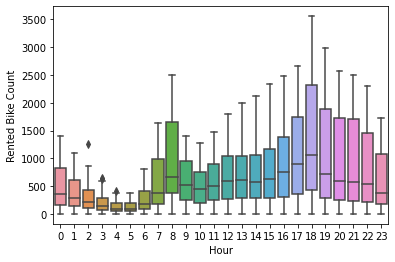

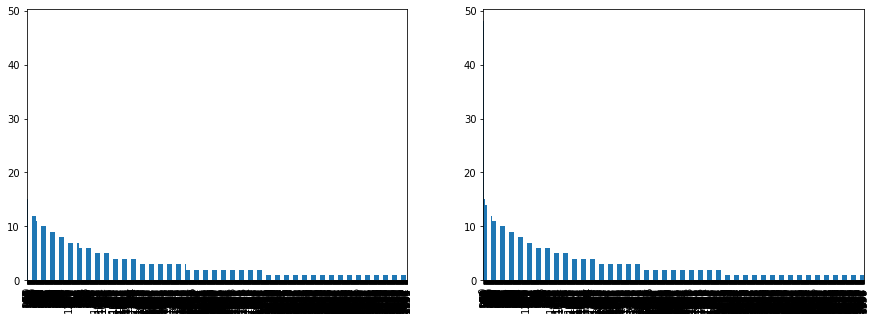

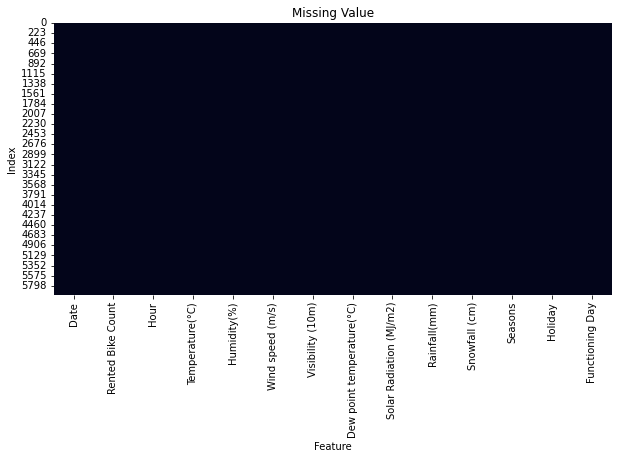

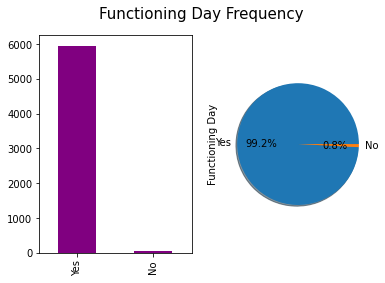

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('/content/drive/MyDrive/PatternProject/DataSet/train.csv')

sns.boxplot(x = 'Hour', y = 'Rented Bike Count', data = train)

print()
print()
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
train['Rented Bike Count'].value_counts().plot(kind = 'bar')
plt.subplot(1,2,2)
train['Rented Bike Count'].value_counts().plot(kind = 'bar')
plt.show()
print()
print()
plt.subplots(figsize=(10,5))
sns.heatmap(train.isnull(),cbar=False)
plt.xlabel('Feature')
plt.ylabel('Index')
plt.title('Missing Value')
plt.show()
print()
print()
#train = pd.read_csv('/content/drive/MyDrive/PatternProject/DataSet/test.csv')
fig, ax = plt.subplots(1, 2)
train["Functioning Day"].value_counts().plot.bar(color="purple", ax=ax[0])
train["Functioning Day"].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,textprops={"fontsize": 10},ax=ax[1])
fig.suptitle("Functioning Day Frequency", fontsize=15)
plt.xticks(rotation=90)
plt.yticks(rotation=45)
print()
print()

In [ ]:
!pip install category_encoders

     |████████████████████████████████| 86 kB 2.9 MB/s 


In [ ]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
data = pd.read_csv('/content/drive/MyDrive/PatternProject/DataSet/train.csv')
Y = data['Rented Bike Count']
day ,month ,year=SplitDae(data)
#data['Day']=day
#data['Month'] = month
#data['Year']=year
X = data.drop(labels=['Rented Bike Count', 'Date','Seasons'], axis=1)
X2 =  OneHotEncoder().fit_transform(X['Functioning Day'].values.reshape(-1,1)).toarray()
dfHot2 = pd.DataFrame(X2, columns=['Functioning Day_' + str(int(i)) for i in range(X2.shape[1])])
X = pd.concat([X, dfHot2], axis=1)
X = X.drop(['Functioning Day'], axis=1)
X3= OneHotEncoder().fit_transform(X['Holiday'].values.reshape(-1,1)).toarray()
dfHot3 = pd.DataFrame(X3, columns=['Holiday_' + str(int(i)) for i in range(X3.shape[1])])
X = pd.concat([X, dfHot3], axis=1)
X = X.drop(['Holiday'], axis=1)
print(X.keys())


importance =mutual_info_classif(X, Y)


names = ['Hour','Temperature(°C)','Humidity(%)', 'Wind speed (m/s)','Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)',
          'Rainfall(mm)','Snowfall (cm)','Holiday_1','Holiday_2','Functioning Day_1','Functioning Day_2']
feat_importance =pd.Series(importance,names)

print(feat_importance)

Index(['Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Functioning Day_0', 'Functioning Day_1', 'Holiday_0', 'Holiday_1'],
      dtype='object')
Hour                         0.205383
Temperature(°C)              0.374270
Humidity(%)                  0.109647
Wind speed (m/s)             0.052286
Visibility (10m)             0.064272
Dew point temperature(°C)    0.232981
Solar Radiation (MJ/m2)      0.153420
Rainfall(mm)                 0.037727
Snowfall (cm)                0.014455
Holiday_1                    0.032956
Holiday_2                    4.330700
Functioning Day_1            0.014149
Functioning Day_2            3.952594
dtype: float64


In [ ]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2

dataset = pd.read_csv('/content/drive/MyDrive/PatternProject/DataSet/train.csv')
Y = dataset['Rented Bike Count']
X = dataset.drop(['Date','Rented Bike Count'], axis=1)    
day ,month ,year=SplitDae(data)
data['Day']=day
data['Month'] = month
data['Year']=year
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

winter,spring,summer,automn = HotEncodingTest(X)
Seasons=pd.DataFrame({'winter':winter,'spring':spring,
                         'summer':summer,'automn':automn})
X = pd.concat([X, Seasons], axis=1)
X = X.drop(['Seasons'], axis=1)    
X2 =  OneHotEncoder().fit_transform(X['Functioning Day'].values.reshape(-1,1)).toarray()
dfHot2 = pd.DataFrame(X2, columns=['Functioning Day_' + str(int(i)) for i in range(X2.shape[1])])
X = pd.concat([X, dfHot2], axis=1)
X = X.drop(['Functioning Day'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )
print('correlated features: ', len(set(corr_features)) )
print(corr_features)

correlated features:  7
correlated features:  7
{'summer', 'automn', 'winter', 'Visibility (10m)', 'Dew point temperature(°C)', 'Functioning Day_1', 'Solar Radiation (MJ/m2)'}


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

X, Y = loadTrainData()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# feature selection

X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features'
c=X_train.keys()
#print(X_train.keys())
for i in range(len(fs.scores_)):
	
  print((c[i],"    ", fs.scores_[i]))

  
	
	#print('')
print(fs.scores_)
	

('Hour', '    ', 839.2140703844207)
('Temperature(°C)', '    ', 3045.3657259210436)
('Humidity(%)', '    ', 104.54881993446722)
('Wind speed (m/s)', '    ', 71.20018312740802)
('Visibility (10m)', '    ', 104.71503061127503)
('Dew point temperature(°C)', '    ', 1379.7442066152691)
('Solar Radiation (MJ/m2)', '    ', 523.1920139791845)
('Rainfall(mm)', '    ', 62.7280565057664)
('Snowfall (cm)', '    ', 127.90714256758382)
('Day', '    ', 5.471756625693166)
('Month', '    ', 58.692164628878515)
('winter', '    ', 1556.3793014104638)
('spring', '    ', nan)
('summer', '    ', 1060.1344240309345)
('automn', '    ', 50.57812508775839)
('Functioning Day_0', '    ', 37.381959363953435)
('Functioning Day_1', '    ', 37.38195936395626)
('Holiday_0', '    ', 45.92180765847461)
('Holiday_1', '    ', 45.921807658475785)
[ 839.21407038 3045.36572592  104.54881993   71.20018313  104.71503061
 1379.74420662  523.19201398   62.72805651  127.90714257    5.47175663
   58.69216463 1556.37930141        

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
X, Y = loadTrainData()
XTest = loadTestData()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
ada=AdaBoostRegressor()
search_grid={'n_estimators':[500,1000,200,1500,3000],'learning_rate':[.001,0.01,.1,0.0001],'random_state':[1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1)
search.fit(X_train,y_train)
print(search.best_params_)

{'learning_rate': 0.01, 'n_estimators': 1000, 'random_state': 1}


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
X, Y = loadTrainData()
XTest = loadTestData()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
grid = GridSearchCV(SVR(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train, y_train)
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ..........C=0.1, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 2/5] END ..........C=0.1, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 3/5] END ..........C=0.1, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 4/5] END ..........C=0.1, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 5/5] END ..........C=0.1, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=0.1, kernel=rbf;, score=nan total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=0.1, kernel=rbf;, score=nan total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=0.1, kernel=rbf;, score=nan total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=0.1, kernel=rbf;, score=nan total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=0.1, kernel=rbf;, score=nan total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=0.01, kernel=rbf;, score=nan total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=0.01, kernel=r

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
125 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 196, in fit
    accept_large_sparse=False,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/utils/

ValueError: ignored